# Importing libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Loading the Dataset

In [117]:
df=pd.read_excel('energy_production 1.xlsx')
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


# EDA

In [118]:
#checking for null values
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

INFERENCE :There are no NULL Values in the dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### checking for outliers in the dataset

Text(0.5, 1.0, 'R Humidity')

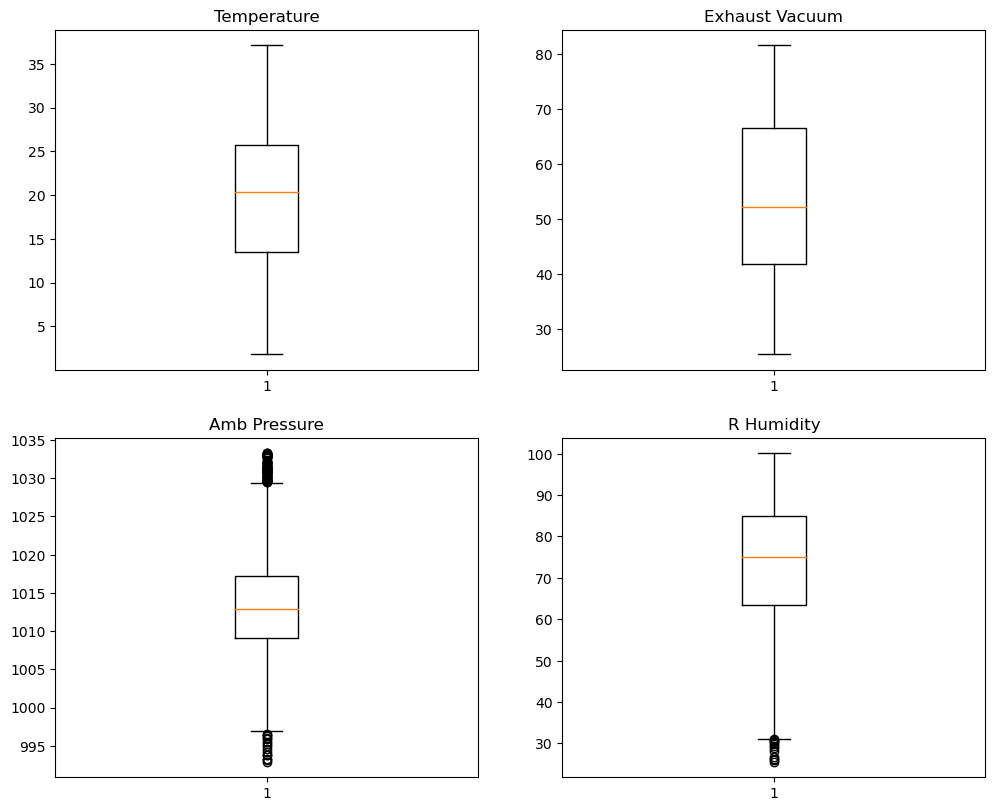

In [120]:
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.boxplot(df['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.boxplot(df['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.boxplot(df['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.boxplot(df['r_humidity'])
plt.title("R Humidity")

### Conclusion:
- columns like amb_pressure and r_humidity have outliers.
- so, we are going to remove outliers by  inter quratile range method.

In [121]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [122]:
# Calculating IQR
IQR_amb = 1017.26-1009.10
IQR_r = 84.83-63.32
#printing
print("IQR for amb_pressure is: ",IQR_amb)
print("IQR for r_humidity is: ",IQR_r)
#Calculating Lower & Upper Extreme for amb_pressure
LE_amb = 1009.10 - IQR_amb * 1.5
UE_amb = 1017.26 + IQR_amb * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE_amb)
print("Upper Extreme of amb_pressure is: ",UE_amb)
#Calculating Lower & Upper Extreme for r_humidity
LE_r = 63.335 - IQR_r * 1.5
UE_r = 81.56 + IQR_r * 1.5
#printing
print("Lower Extreme of r_humidity is: ",LE_r)
print("Upper Extreme of r_humidity is: ",UE_r)

IQR for amb_pressure is:  8.159999999999968
IQR for r_humidity is:  21.509999999999998
Lower Extreme of amb_pressure is:  996.8600000000001
Upper Extreme of amb_pressure is:  1029.5
Lower Extreme of r_humidity is:  31.07
Upper Extreme of r_humidity is:  113.825


## Outliers Removal using lower and upper extreme values

In [123]:
# Original shape before outlier removal
df.shape

(9568, 5)

In [124]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(df[df.amb_pressure<LE_amb])

15

In [125]:
#Removing Outliers of amb_pressure 
df1 = df[~(df.amb_pressure<LE_amb)]
df1.shape

(9553, 5)

In [126]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df1[df1.amb_pressure>UE_amb])

73

In [127]:
#Removing Outliers of amb_pressure 
df2 = df1[~(df1.amb_pressure>UE_amb)]
df2.shape

(9480, 5)

In [128]:
# Checking Total Outliers for Lower Extreme of r_humidity
len(df2[df2.r_humidity<LE_r])

12

In [129]:
# Removing Outliers of r_humidity
df3 = df2[~(df2.r_humidity<LE_r)]
df3.shape

(9468, 5)

In [130]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df1[df1.r_humidity>UE_r])

0

Text(0.5, 1.0, 'R Humidity')

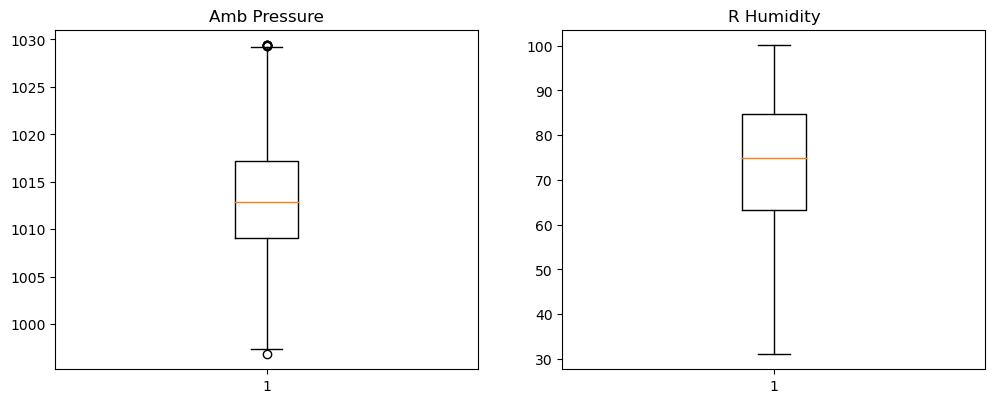

In [131]:
# BoxPlot After Outliers Removal
plt.figure(figsize=(12,15))

plt.subplot(321)
plt.boxplot(df3['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(322)
plt.boxplot(df3['r_humidity'])
plt.title("R Humidity")

### Inference: Now we only have outliers in amb_pressure,we will remove them again using IQR

In [132]:
# Descriptive Stats
df3.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9468.000000,9468.00000,9468.000000,9468.000000,9468.000000
mean,19.719883,54.41369,1013.148802,73.322083,454.209298
std,7.427311,12.70141,5.704623,14.551203,17.029285
min,1.810000,25.36000,996.870000,31.150000,420.260000
25%,13.577500,41.74000,1009.090000,63.285000,439.697500
50%,20.500000,52.72000,1012.900000,74.980000,451.210000
75%,25.760000,66.54000,1017.170000,84.840000,468.190000
max,37.110000,81.56000,1029.410000,100.160000,495.760000


In [133]:
# Calculating IQR
IQR = 1017.17 - 1009.09
#printing
print("IQR for amb_pressure is: ",IQR)

#Calculating Lower & Upper Extreme for amb_pressure
LE = 1009.09 - IQR * 1.5
UE = 1017.17 + IQR * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE)
print("Upper Extreme of amb_pressure is: ",UE)

IQR for amb_pressure is:  8.079999999999927
Lower Extreme of amb_pressure is:  996.9700000000001
Upper Extreme of amb_pressure is:  1029.29


In [134]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(df3[df3.amb_pressure<LE])

1

In [135]:
#Removing Outliers of amb_pressure
df4 = df3[~(df3.amb_pressure<LE)]
df4.shape

(9467, 5)

In [136]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df4[df4.amb_pressure>UE])

6

In [137]:
#Removing Outliers of amb_pressure
df5 = df4[~(df4.amb_pressure>UE)]
df5.shape

(9461, 5)

Text(0.5, 1.0, 'Amb Pressure')

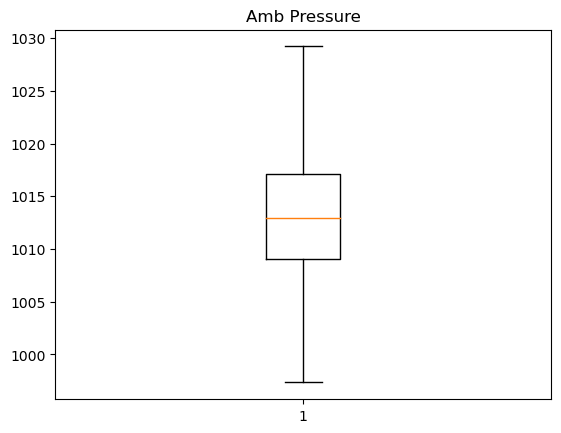

In [138]:
#BoxPlot After Outliers Removal 
plt.boxplot(df5['amb_pressure'])
plt.title("Amb Pressure")

Inference : There are No more Outliers present in the dataset

In [139]:
# Final Dataset after EDA
df5.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


## Histogram Plot

Text(0.5, 1.0, 'R Humidity')

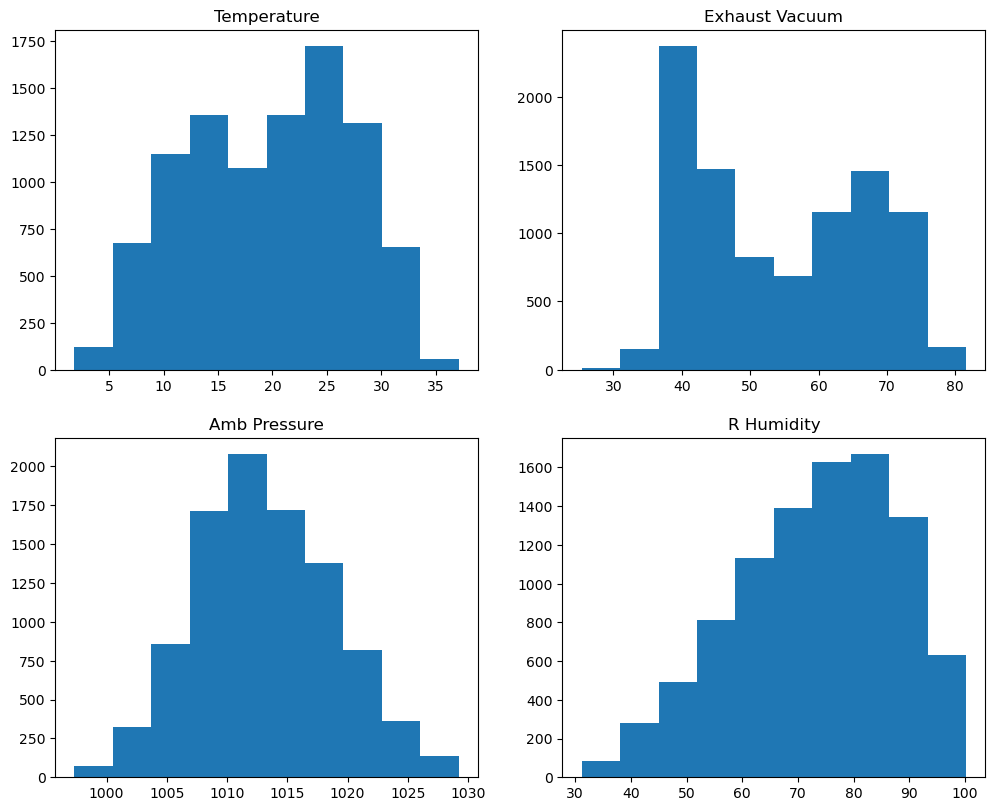

In [140]:
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.hist(df5['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.hist(df5['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.hist(df5['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.hist(df5['r_humidity'])
plt.title("R Humidity")

## Detecting Collieanrity B/W Independent Variables

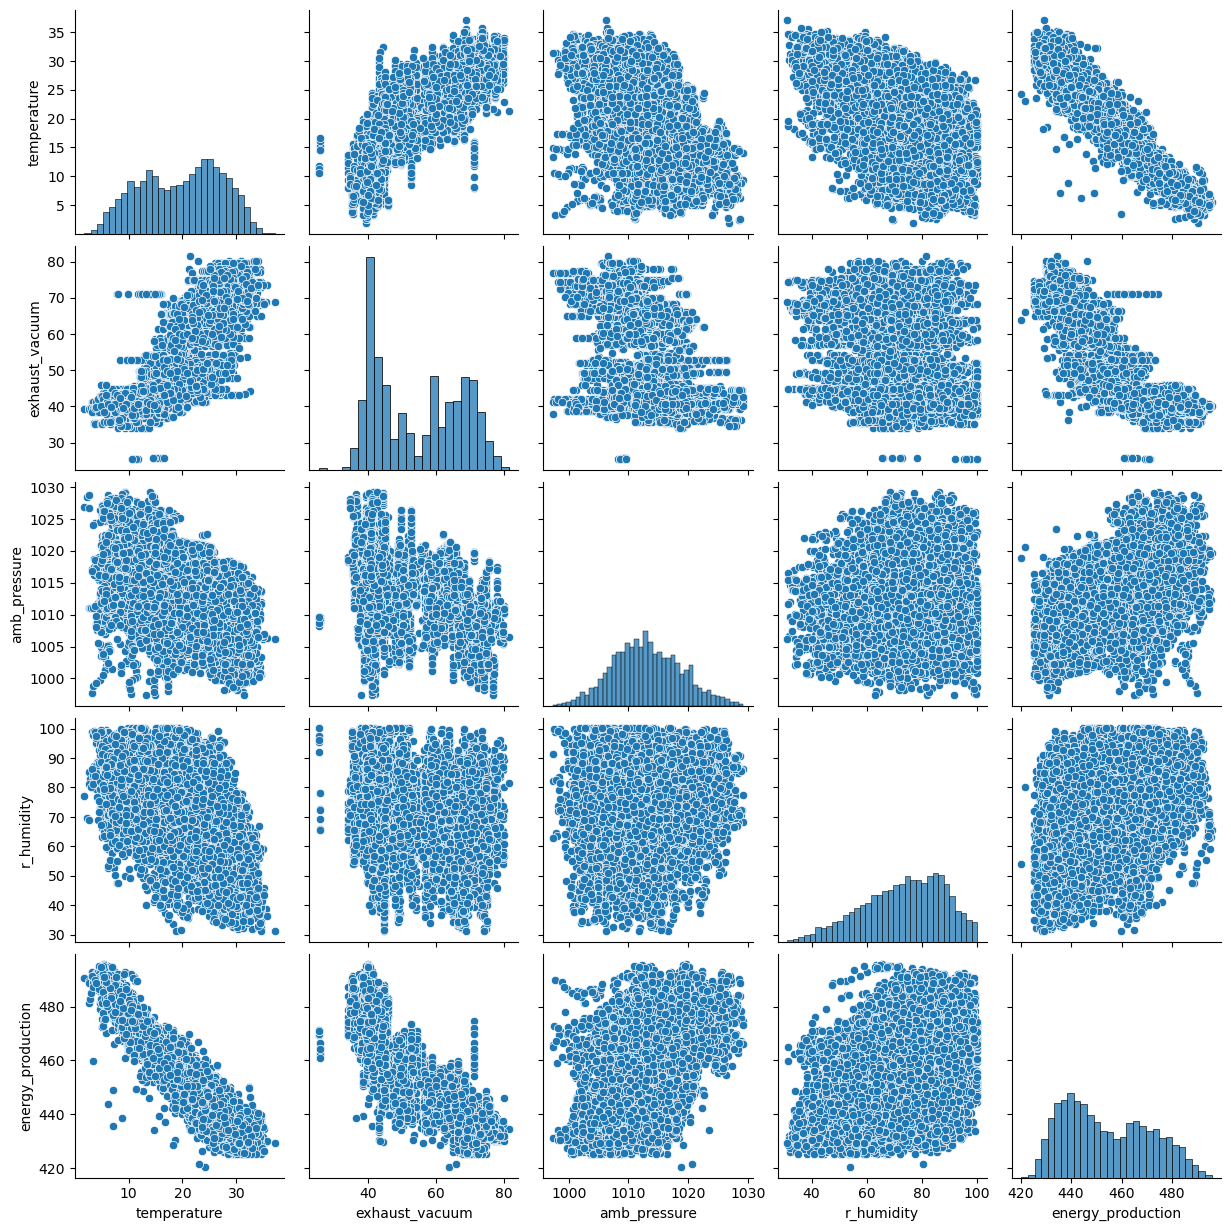

In [141]:
sns.pairplot(df5)

In [142]:
df5.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842728,-0.508625,-0.542175,-0.947491
exhaust_vacuum,0.842728,1.000000,-0.415389,-0.310217,-0.868693
amb_pressure,-0.508625,-0.415389,1.000000,0.105210,0.521194
r_humidity,-0.542175,-0.310217,0.105210,1.000000,0.388023
energy_production,-0.947491,-0.868693,0.521194,0.388023,1.000000


### Inference: As we can see "temperature" & "exhaust_vaccum" have a strong positve Correlation, So can say there is a multicollinearity effect present

In [143]:
#check for VIF 'temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'
rsq_Tem = smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=df5).fit().rsquared  
vif_Tem = 1/(1-rsq_Tem) 

rsq_ex = smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=df5).fit().rsquared  
vif_ex = 1/(1-rsq_ex) 

rsq_amb = smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=df5).fit().rsquared  
vif_amb = 1/(1-rsq_amb) 

rsq_rh = smf.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=df5).fit().rsquared  
vif_rh = 1/(1-rsq_rh) 

# Storing vif values in a data frame
d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_Tem,vif_ex,vif_amb,vif_rh]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,temperature,5.906452
1,exhaust_vacuum,3.907032
2,amb_pressure,1.447254
3,r_humidity,1.696703


Inference: There is no Mulit-collinearity between the variables , Since VIF is less then 20.

## MODEL BUILDINGS

In [144]:
df5.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [145]:
formula='energy_production ~ temperature + exhaust_vacuum + amb_pressure + r_humidity'
model=smf.ols(formula,df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.049e+04
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:34:17   Log-Likelihood:                -27794.
No. Observations:                9461   AIC:                         5.560e+04
Df Residuals:                    9456   BIC:                         5.563e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        442.0964     10.225     43.236      0.000     422.053     462.140
temperature       -1.9745      0.015   -128.448      0.000      -2.005      -1.944
exhaust_vacuum    -0.2342      0.007    -32.046      0.000      -0.249      -0.220
amb_pressure       0.0745      0.010      7.498      0.000       0.055       0.094
r_humidity        -0.1588      0.004    -37.764      0.000      -0.167      -0.151
==============================================================================
Omnibus:                      891.386   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4077.544
Skew:                          -0.359   Prob(JB):                         0.00
Kurtosis:                       6.135   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### from above OLS method i can see it is giving 92.8 accuracy so lets go with Linear Regression with train and test split

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [147]:
X=df5.iloc[:,0:4]
y=df5.iloc[:,4]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)*100

92.6873415836897

here i can see i am getting same Accuracy 92.6

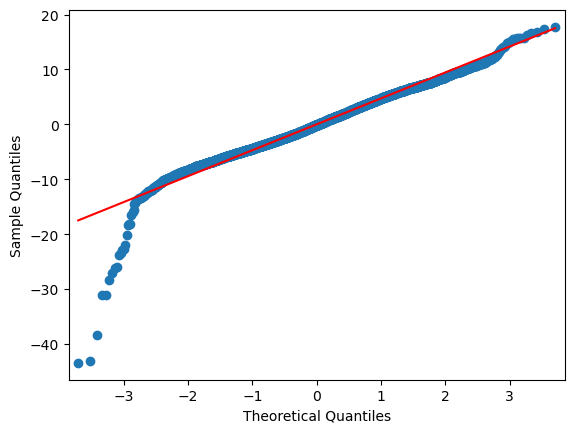

In [150]:
sm.qqplot(model.resid,line='q')
plt.show()

In [151]:
list(np.where(model.resid<-20))
#we have to look into this factor

[array([1321, 1529, 1634, 2121, 2841, 3629, 5421, 5631, 6166, 7637, 7977,
        8008, 8625, 9109, 9459], dtype=int64)]

In [152]:
#checking for homoscedacity/heteroscedacity
def standard_val(val):
  return (val-val.mean())/val.std()

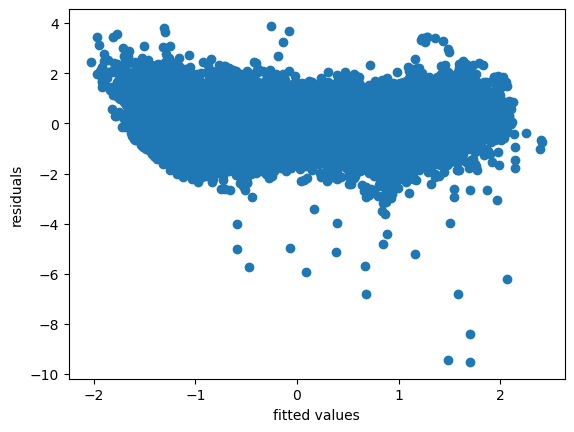

In [153]:
plt.scatter(standard_val(model.fittedvalues),standard_val(model.resid))
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

 residuals regression plot for temperature


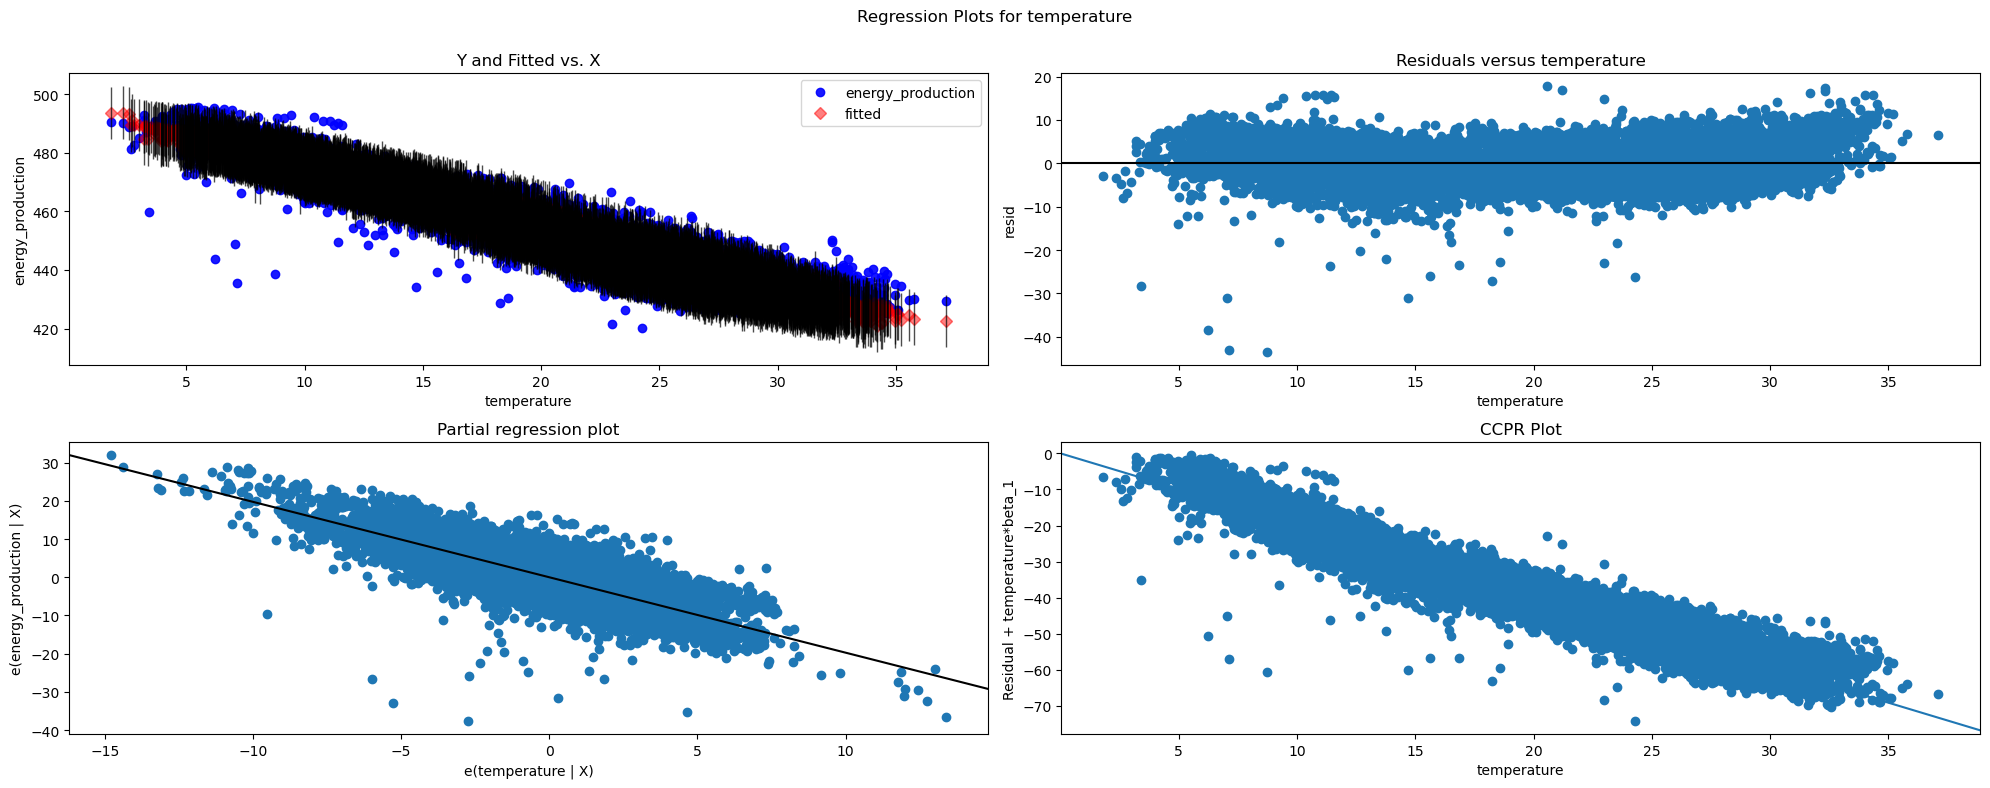

***************************************
 residuals regression plot for exhaust_vacuum


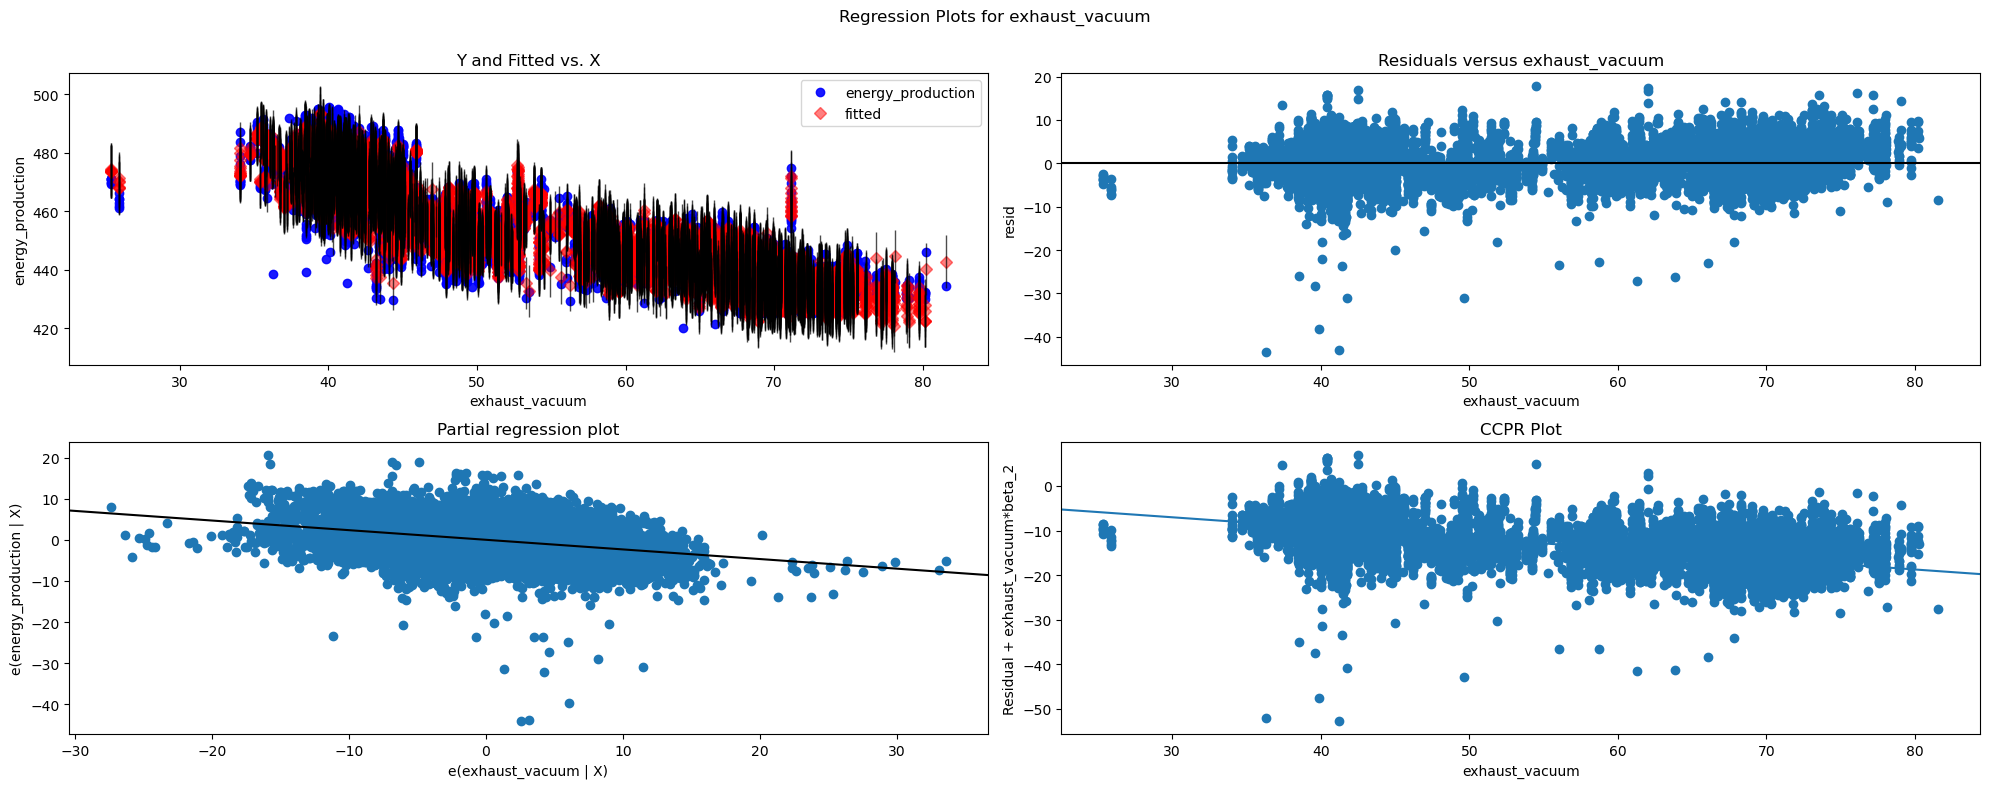

***************************************
 residuals regression plot for amb_pressure


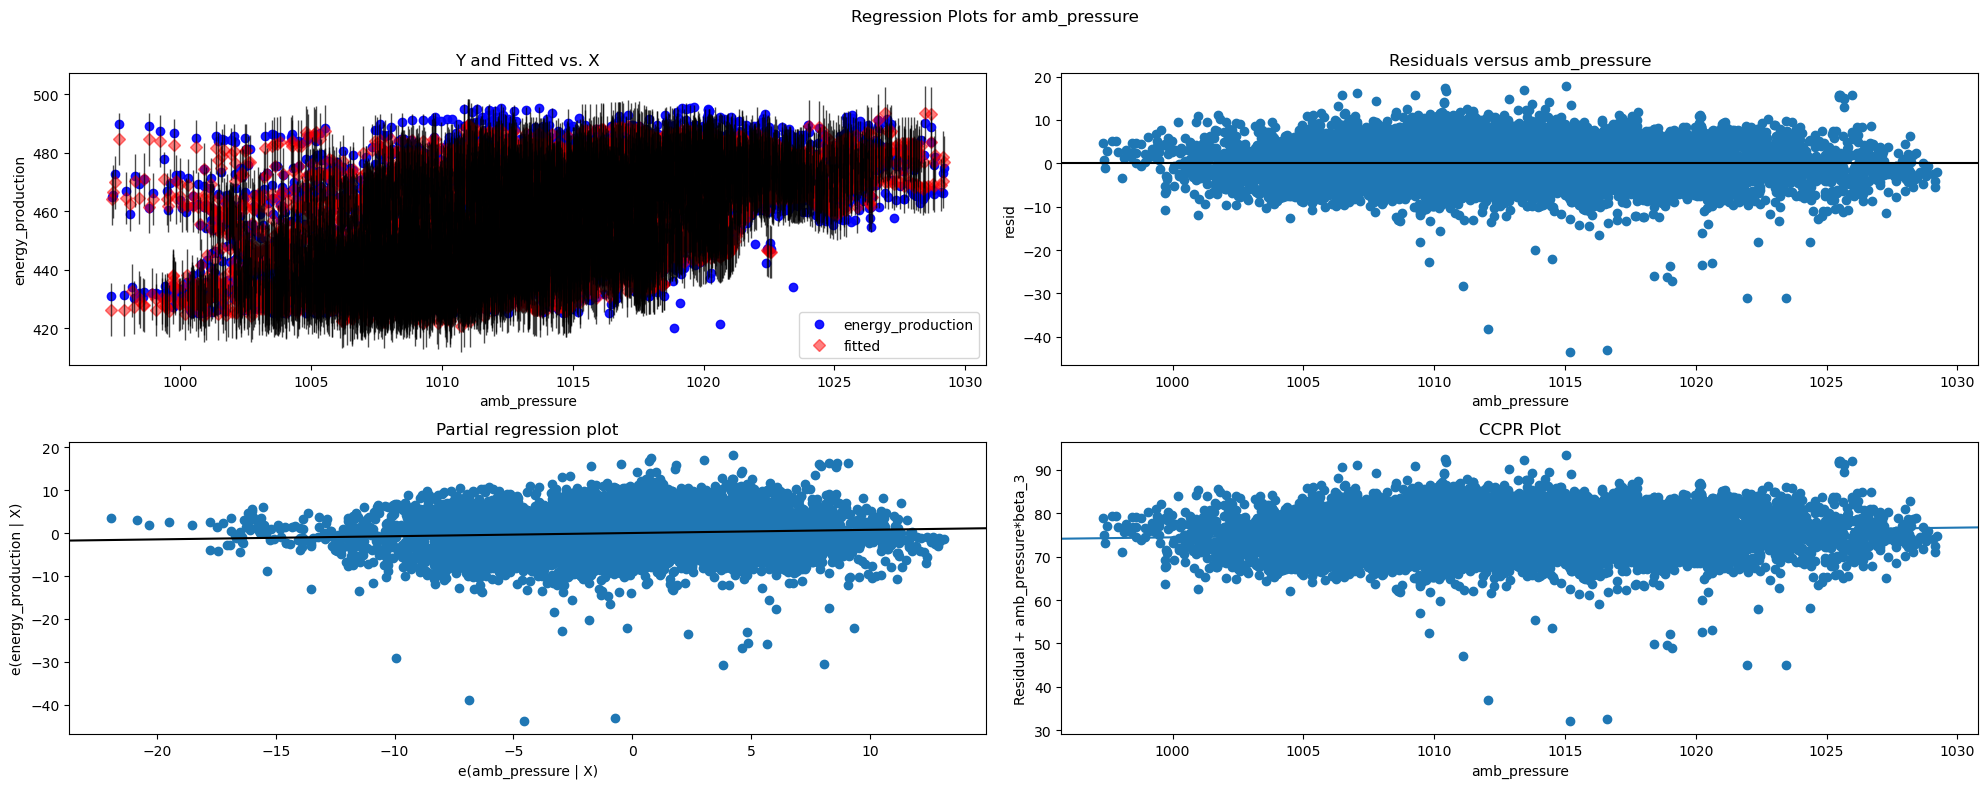

***************************************
 residuals regression plot for r_humidity


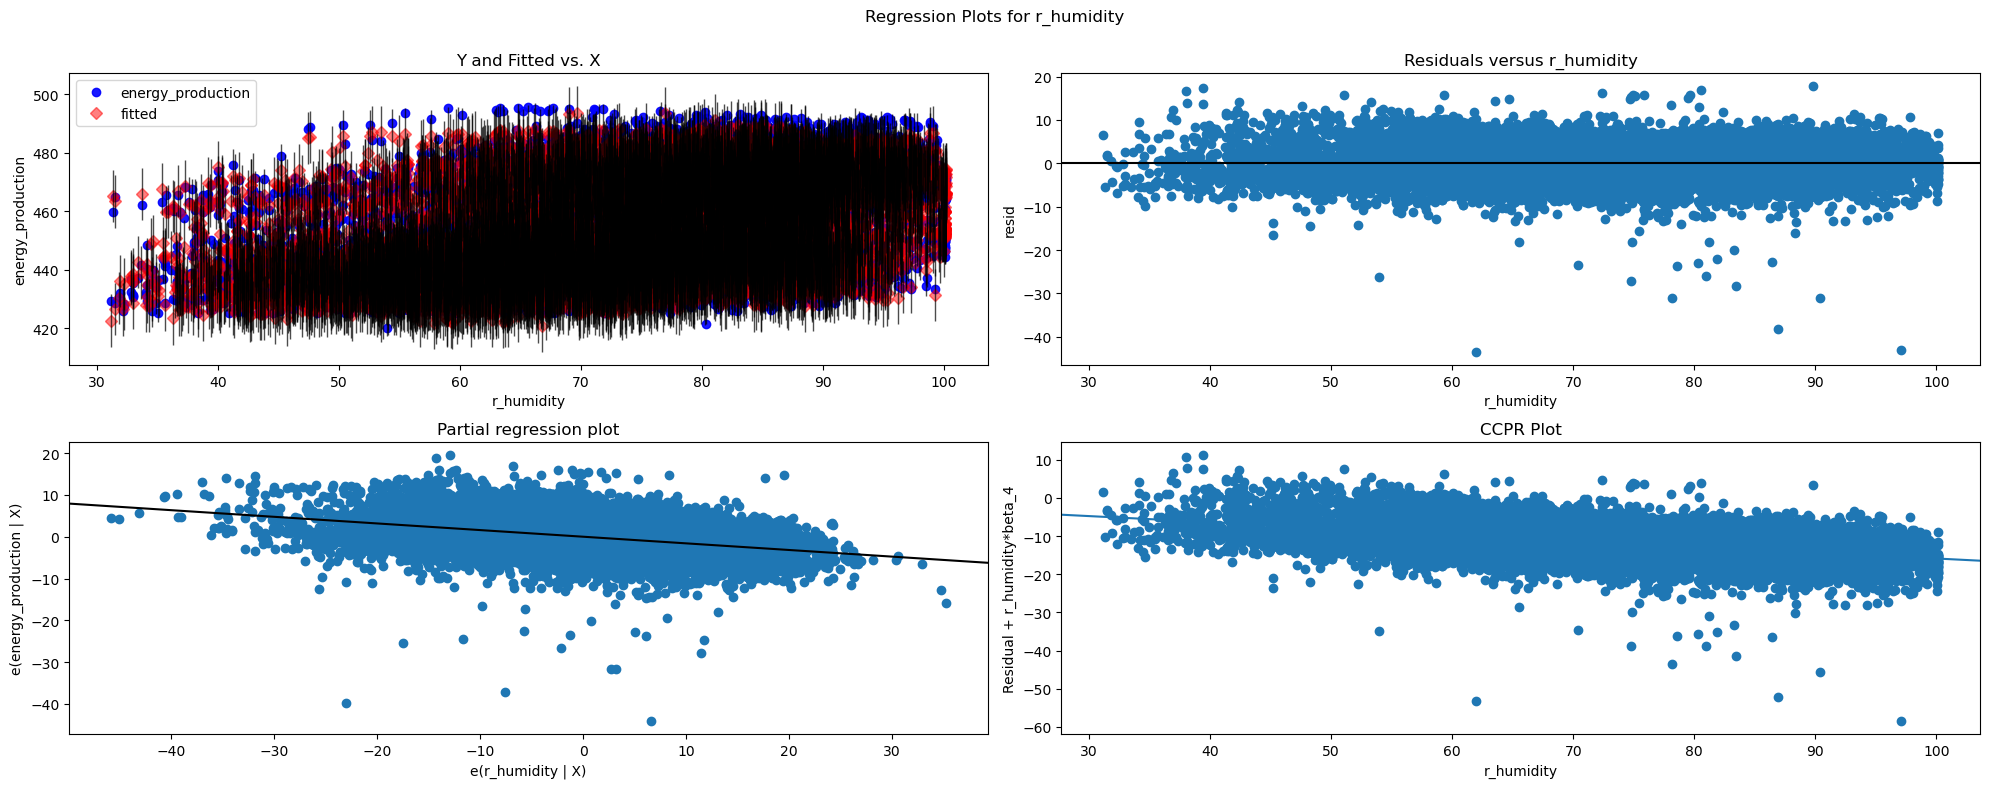

***************************************


In [154]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
for i in df5.columns:
  if i!='energy_production':
    fig=plt.figure(figsize=(20,8))
    print(" residuals regression plot for {}".format(i))
    sm.graphics.plot_regress_exog(model,i,fig=fig)
    plt.show()
    print("***************************************")

In [155]:
#cooks distance
(c,_)=model.get_influence().cooks_distance

In [156]:
c

array([7.20390804e-06, 7.37296235e-05, 2.20610722e-05, ...,
       2.23349838e-04, 3.40251806e-03, 1.75497093e-04])

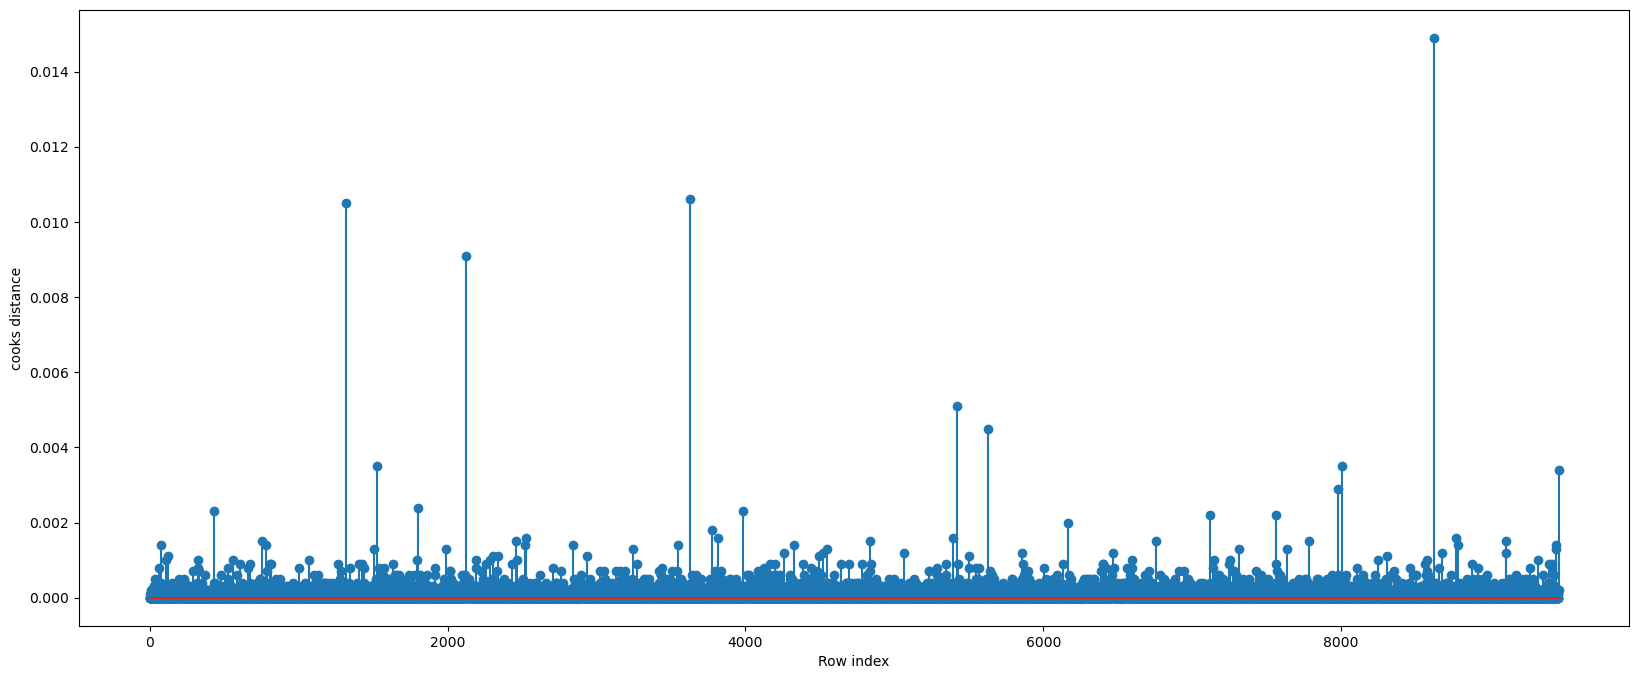

In [157]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df5)),np.round(c,4))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [159]:
#lets go with other model

# Ridge
from sklearn.linear_model import Ridge

ridge_mod=Ridge(alpha=1)
ridge_mod.fit(X_train,y_train)
y_pred=ridge_mod.predict(X_test)

root_mean_sq_er_Ridge=(np.mean(y_pred-y_test)**2)**0.5
print("root mean square error",root_mean_sq_er_Ridge)


Ridge_df=pd.DataFrame()
Ridge_df['columns']=X_train.columns
Ridge_df['coefficients']=ridge_mod.coef_
Ridge_df

root mean square error 0.0585670123160904


,columns,coefficients
0,temperature,-1.965933
1,exhaust_vacuum,-0.236967
2,amb_pressure,0.075456
3,r_humidity,-0.157464


In [160]:
from sklearn.linear_model import Lasso

lasso_mod=Lasso(alpha=1)
lasso_mod.fit(X_train,y_train)
y_pred=lasso_mod.predict(X_test)

root_mean_sq_er_Lasso=(np.mean(y_pred-y_test)**2)**0.5
print("root mean square error",root_mean_sq_er_Lasso)


lasso_df=pd.DataFrame()
lasso_df['columns']=X_train.columns
lasso_df['coefficients']=ridge_mod.coef_
lasso_df

root mean square error 0.05610727974000772


,columns,coefficients
0,temperature,-1.965933
1,exhaust_vacuum,-0.236967
2,amb_pressure,0.075456
3,r_humidity,-0.157464


In [161]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold

#DecisionTreeRegressor

seed =7
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
cart=DecisionTreeRegressor()
num_tree=100
model=BaggingRegressor(estimator=cart,n_estimators=num_tree,random_state=seed)
result=cross_val_score(model,X_train,y_train,cv=kfold)
print(result)

print("the average result is ",np.mean(result))

[0.963886   0.96932746 0.9576083  0.96264961 0.96385506 0.95389926
 0.95490335 0.96125267 0.95888287 0.93925501]
the average result is  0.95855195713397


In [163]:
!pip install xgboost
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

#from tpot import TPOTRegressor

from sklearn.model_selection import ShuffleSplit

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 0.5/99.8 MB 5.6 MB/s eta 0:00:18
   ---------------------------------------- 1.0/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 1.6/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 1.9/99.8 MB 9.1 MB/s eta 0:00:11
    --------------------------------------- 2.1/99.8 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 2.4/99.8 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 2.6/99.8 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 3.2/99.8 MB 7.7 MB/s eta 0:00:13
   - ---------------------------

In [164]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' :
		          	{'model': LinearRegression(),
                 'params':{'copy_X' : [True, False],
                           'fit_intercept' : [True, False],
                           'n_jobs' : [1,2,3],
                           'positive' : [True, False]}
            },
        'ridge':
			{'model': Ridge(),'params': { 'alpha': [0.1,0.1,0.5,1]}
        },
        'lasso':
			{'model': Lasso(),'params': {'alpha': [0.1,0.5,1],'selection': ['random', 'cyclic']}
        },
        'decision_tree':
			{'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse', 'friedman_mse'],'splitter': ['best','random']}
        },
        'Random Forest':
			{'model': RandomForestRegressor(),'params': {'n_estimators' : [100,125,150,200],'max_features': [3,4]}
        },
        'XGBoost':
			{'model': XGBRegressor(),'params': {'n_estimators' : [100,125,150,200,225,250],'max_depth': [3,4,5],'learning_rate':[0.1,0.2,0.3,0.4]}
        },
        'SVM':
			{'model': SVR(),'params': {'kernel' :['rbf']}
        },
        'KNN':
			{'model': KNeighborsRegressor(),'params': {'n_neighbors':[5,10,15,20,25,30,35,40,45,50]}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.925317,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,ridge,0.925317,{'alpha': 0.1}
2,lasso,0.925316,"{'alpha': 0.1, 'selection': 'random'}"
3,decision_tree,0.921711,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,Random Forest,0.955612,"{'max_features': 3, 'n_estimators': 200}"
5,XGBoost,0.959490,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
6,SVM,0.268736,{'kernel': 'rbf'}
7,KNN,0.938166,{'n_neighbors': 5}


In [166]:
# XGBoost 0.95949{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 250}

# now lets go with the model XGBoost
model_final=XGBRegressor(n_estimators= 250,max_depth=5,learning_rate=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

95.61853086597061

## Best Model For Deployment

### XGBoost

In [167]:
gb_model = XGBRegressor(n_estimators=250,learning_rate=0.2, max_depth=5)
gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)*100

96.2416536983454

In [168]:
import pickle

In [169]:
pickle_out = open('gb_model.pkl','wb')
pickle.dump(gb_model,pickle_out)
pickle_out.close()

### Random Forest

In [171]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=20)
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)*100

95.10737759971056

### Pickling the File

In [172]:
pickle_out = open('rf_model.pkl','wb')
pickle.dump(rf_model,pickle_out)
pickle_out.close()